In [1]:
import pandas as pd
import numpy as np
import modules.analysis as analysis
import modules.utils as utils
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from itertools import product

from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, _util
#from Orange.evaluation import compute_CD, graph_ranks

# TS decomposition analysis
## Create metric CSV

In [27]:
df = analysis.eval_metrics('2023012413955919', out_path='analysis/benchmark/', min_months=24)

## Plot benchmark charts

In [2]:
exp_ids = [2022102313544246, 2022102313544325, 2022110413591325, 2022110813610319, 
           2022110213583060, 2022110213583128, 2022110413591387, 2022110813610380,
           None, 2023012413955888, None, None,
           None, 2023012313953324, None, None,
           2022102513552709, 2022102513552801, 2022110313584614, 2022110813610397,
           None, 2023012313953294, None, None,
           2022103113574994, 2022103113574896, 2022110413591449, 2022110813610413,
           None, 2023012413955919, None, None,
          ]
var_sets = ['RS minimal', 'RS minimal', 'RS minimal', 'RS minimal', 
            'RS minimal +VI', 'RS minimal +VI', 'RS minimal +VI', 'RS minimal +VI',
            'RS minimal +Year', 'RS minimal +Year', 'RS minimal +Year', 'RS minimal +Year',
            'RS meteo +SIF', 'RS meteo +SIF', 'RS meteo +SIF', 'RS meteo +SIF',
            'RS', 'RS', 'RS', 'RS', 
            'RS +Year', 'RS +Year', 'RS +Year', 'RS +Year',
            'RS meteo', 'RS meteo', 'RS meteo', 'RS meteo',
            'RS meteo +Year', 'RS meteo +Year', 'RS meteo +Year', 'RS meteo +Year',
            ]
frameworks = ['Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon', 
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon', 
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon',
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon',
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon',
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon',
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon',
              'Random Forest', 'H2O AutoML', 'AutoSklearn', 'AutoGluon',
             ]

frames =[]
for idx, exp_id in enumerate(exp_ids):
    if exp_id is None:
        print(exp_id, 'skipped.')
        continue
        
    df = pd.read_csv('analysis/benchmark/' + str(exp_id) + '/metrics.csv')
    df['Explanatory variable set'] = var_sets[idx]
    df['Framework'] = frameworks[idx]
    frames.append(df)
    
df = pd.concat(frames)

None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.
None skipped.


In [8]:
# only for 500m resolution
df500 = pd.read_csv('analysis/benchmark/2022110313584310/metrics.csv')

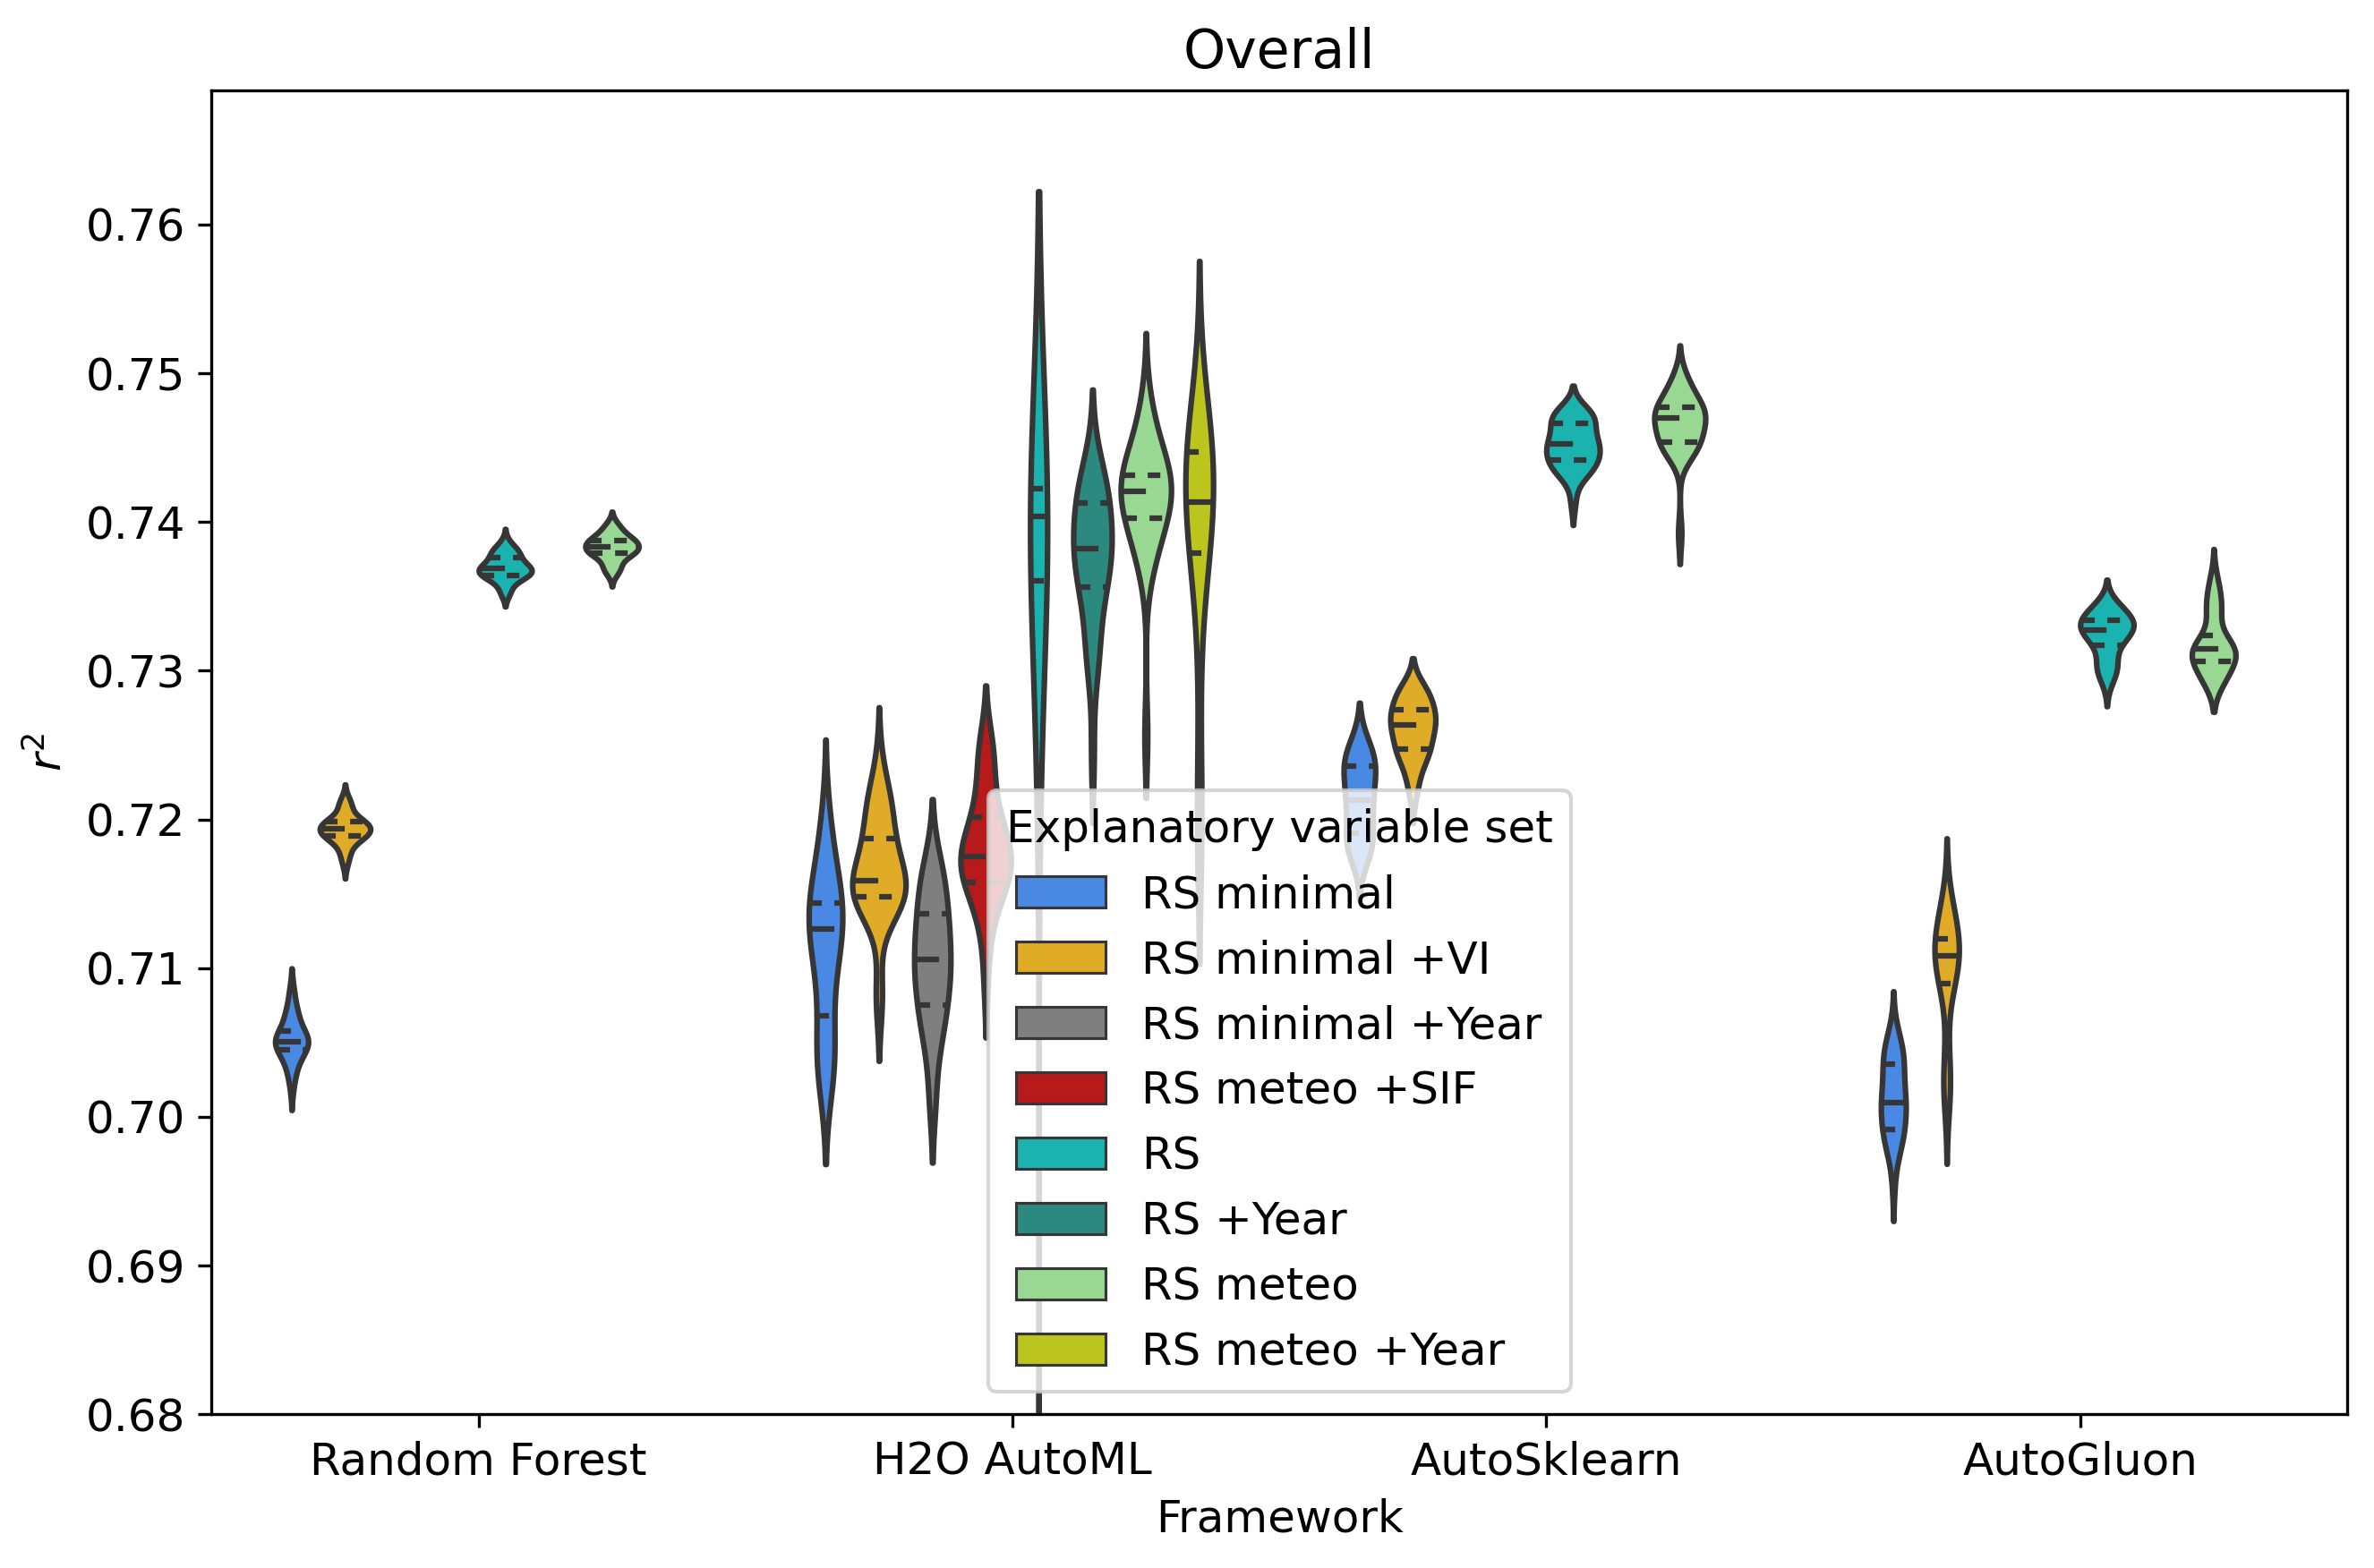

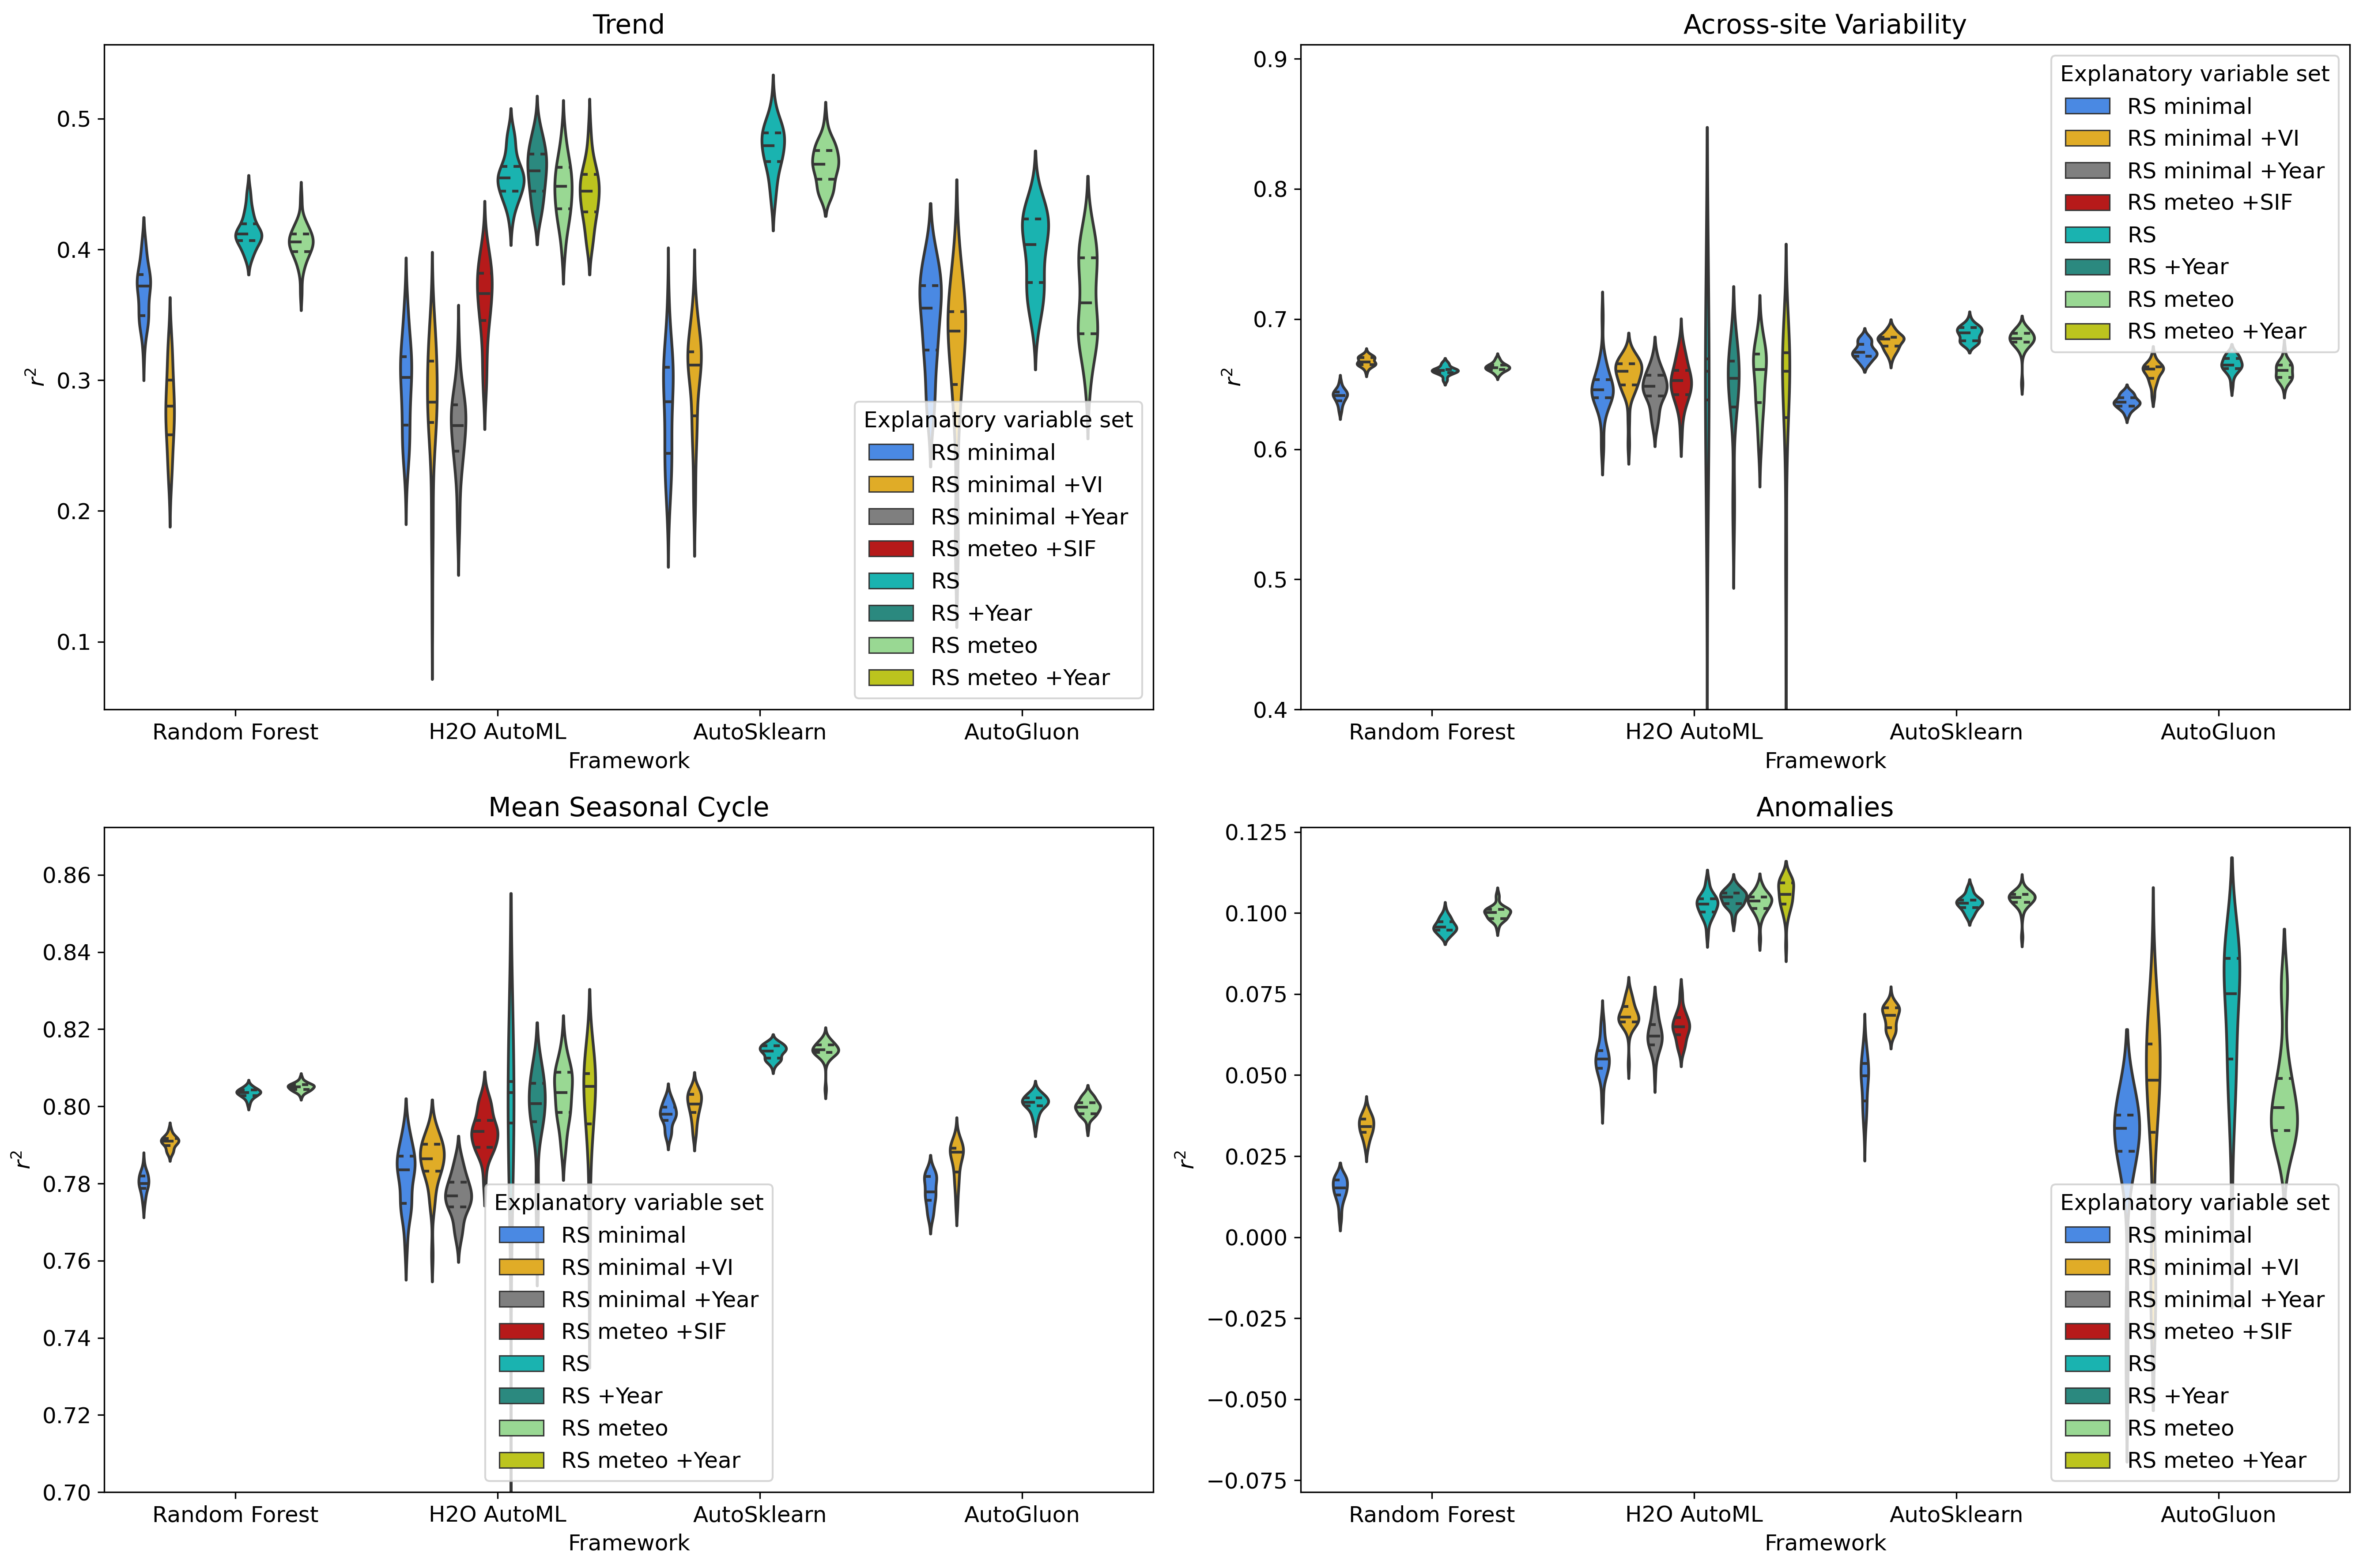

In [29]:
analysis.plt_model_comparison(df, 'analysis/benchmark/', 'Explanatory variable set', 'Framework', 'r2_overall', ylims=[(0.68, None), None, (0.4, None), (0.7, None), None])

## Testing

In [13]:
df.columns = ['exp_id', 'r2 overall', 'r2 trend', 'r2 anomalies', 'r2 across site variability', 'r2 mean seasonal cycle', 'RMSE overall', 'RMSE trend', 'RMSE anomalies', 'RMSE across site variability', 'RMSE mean seasonal cycle', 'Explanatory variable set', 'Framework']

In [14]:
df.groupby(['Framework', 'Explanatory variable set']).mean()

/tmp/ipykernel_180/511759837.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Framework', 'Explanatory variable set']).mean()


r2 overall  r2 trend  r2 anomalies  \
Framework     Explanatory variable set                                       
AutoGluon     RS                          0.732416  0.398281      0.068313   
              RS meteo                    0.731773  0.362325      0.043870   
              RS minimal                  0.701308  0.345597      0.026747   
              RS minimal +VI              0.709655  0.319889      0.037552   
AutoSklearn   RS                          0.745202  0.477413      0.103077   
              RS meteo                    0.746581  0.464917      0.104210   
              RS minimal                  0.721410  0.278891      0.048244   
              RS minimal +VI              0.726082  0.301064      0.068003   
H2O AutoML    RS                          0.735369  0.455500      0.102501   
              RS +Year                    0.737572  0.459705      0.104530   
              RS meteo                    0.741576  0.444822      0.103198   
              RS meteo +SIF               0.718009  0.360130      0.064994   
              RS meteo +Year              0.739380  0.442294      0.105510   
              RS minimal                  0.711214  0.295208      0.055044   
              RS minimal +VI              0.716639  0.280111      0.068353   
              RS minimal +Year            0.710423  0.260861      0.062490   
Random Forest RS                          0.736942  0.413648      0.096008   
              RS meteo                    0.738279  0.404736      0.100064   
              RS minimal                  0.705215  0.367369      0.014700   
              RS minimal +VI              0.719338  0.277841      0.034191   

                                        r2 across site variability  \
Framework     Explanatory variable set                               
AutoGluon     RS                                          0.664953   
              RS meteo                                    0.660072   
              RS minimal                                  0.636158   
              RS minimal +VI                              0.658935   
AutoSklearn   RS                                          0.688638   
              RS meteo                                    0.684148   
              RS minimal                                  0.675457   
              RS minimal +VI                              0.682727   
H2O AutoML    RS                                          0.618637   
              RS +Year                                    0.643134   
              RS meteo                                    0.653530   
              RS meteo +SIF                               0.651492   
              RS meteo +Year                              0.634700   
              RS minimal                                  0.645589   
              RS minimal +VI                              0.655868   
              RS minimal +Year                            0.646587   
Random Forest RS                                          0.660388   
              RS meteo                                    0.663041   
              RS minimal                                  0.640792   
              RS minimal +VI                              0.667435   

                                        r2 mean seasonal cycle  RMSE overall  \
Framework     Explanatory variable set                                         
AutoGluon     RS                                      0.800695      1.984148   
              RS meteo                                0.799796      1.986526   
              RS minimal                              0.778099      2.096417   
              RS minimal +VI                          0.785791      2.066893   
AutoSklearn   RS                                      0.814157      1.936164   
              RS meteo                                0.814452      1.930908   
              RS minimal                              0.797806      2.024645   
              RS minimal +VI                          0.800177

In [15]:
df.groupby(['Framework', 'Explanatory variable set']).agg(lambda x: x.std(ddof=1) / np.sqrt(x.count()))

/tmp/ipykernel_180/1796959565.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df.groupby(['Framework', 'Explanatory variable set']).agg(lambda x: x.std(ddof=1) / np.sqrt(x.count()))


r2 overall  r2 trend  r2 anomalies  \
Framework     Explanatory variable set                                       
AutoGluon     RS                          0.000286  0.005726      0.004424   
              RS meteo                    0.000369  0.006738      0.002992   
              RS minimal                  0.000471  0.006816      0.003935   
              RS minimal +VI              0.000714  0.010726      0.005814   
AutoSklearn   RS                          0.000287  0.003452      0.000430   
              RS meteo                    0.000370  0.002704      0.000531   
              RS minimal                  0.000461  0.007558      0.001397   
              RS minimal +VI              0.000353  0.007031      0.000610   
H2O AutoML    RS                          0.003287  0.003101      0.000655   
              RS +Year                    0.000838  0.003659      0.000489   
              RS meteo                    0.000755  0.004180      0.000617   
              RS meteo +SIF               0.000684  0.005531      0.000807   
              RS meteo +Year              0.001478  0.003983      0.000876   
              RS minimal                  0.000944  0.006494      0.001074   
              RS minimal +VI              0.000655  0.009297      0.000778   
              RS minimal +Year            0.000781  0.005768      0.000932   
Random Forest RS                          0.000156  0.002284      0.000396   
              RS meteo                    0.000154  0.002451      0.000389   
              RS minimal                  0.000269  0.003812      0.000674   
              RS minimal +VI              0.000178  0.005699      0.000604   

                                        r2 across site variability  \
Framework     Explanatory variable set                               
AutoGluon     RS                                          0.001212   
              RS meteo                                    0.001296   
              RS minimal                                  0.000891   
              RS minimal +VI                              0.001376   
AutoSklearn   RS                                          0.001019   
              RS meteo                                    0.001468   
              RS minimal                                  0.001139   
              RS minimal +VI                              0.001108   
H2O AutoML    RS                                          0.030742   
              RS +Year                                    0.007110   
              RS meteo                                    0.004604   
              RS meteo +SIF                               0.002914   
              RS meteo +Year                              0.011463   
              RS minimal                                  0.003447   
              RS minimal +VI                              0.002693   
              RS minimal +Year                            0.002510   
Random Forest RS                                          0.000621   
              RS meteo                                    0.000576   
              RS minimal                                  0.001010   
              RS minimal +VI                              0.000636   

                                        r2 mean seasonal cycle  RMSE overall  \
Framework     Explanatory variable set                                         
AutoGluon     RS                                      0.000432      0.001061   
              RS meteo                                0.000386      0.001369   
              RS minimal                              0.000705      0.001653   
              RS minimal +VI                          0.000891      0.002531   
AutoSklearn   RS                                      0.000320      0.001089   
              RS meteo                                0.000437      0.001407   
              RS minimal                              0.000549      0.001676   
              RS minimal +VI                          0.000660

### Friedman and Nemeyi Test

In [9]:
def cd_plot(result, ax=None):
    # necessary since the autorank package messes up the cd plot
    rankdf, treatments, groups = _util.get_sorted_rank_groups(result, True)
    cd = result.cd
    meanrank = rankdf.values
    
    plot = False
    if ax is None:
        _, ax = plt.subplots(figsize=(5,1.8))
        plt.subplots_adjust(left=0.2, right=0.8)
        plot = True

    limits = (len(treatments), 1)
    split = len(treatments) // 2
    cd_ypos = 0.4
    label_yoffset = -0.4
    label_yincr = -0.4
    bar_yoffset = -0.1
    bar_yincr = -0.1
    label_ymax = label_yoffset + (split -1) * label_yincr + len(groups) * bar_yincr + bar_yoffset

    # set up plot
    ax.set_xlim(limits)
    ax.set_ylim(-1, 0.6)
    ax.spines['top'].set_position('zero')
    #ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_visible(False)
    for pos in ["bottom", "left", "right"]: 
        ax.spines[pos].set_visible(False)

    # CD bar
    ax.plot([limits[0],limits[0]-cd], [cd_ypos,cd_ypos], color="k")
    ax.plot([limits[0],limits[0]], [cd_ypos-0.03,cd_ypos+0.03], color="k")
    ax.plot([limits[0]-cd,limits[0]-cd], [cd_ypos-0.03,cd_ypos+0.03], color="k") 
    ax.text(limits[0]-cd/2., cd_ypos, "CD", ha="center", va="bottom") 

    # annotations
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
    kw = dict(xycoords='data',textcoords="data",
              arrowprops=arrowprops, bbox=bbox_props, va="center")

    idx_sorted = np.argsort(meanrank)

    # left side
    label_y = label_yoffset
    for ii in range(0, split):
        idx = idx_sorted[ii]
        ax.annotate(treatments[idx], xy=(meanrank[idx], 0), xytext=(limits[1]-0.1, label_y), ha='left',**kw)
        label_y += label_yincr

    # right side
    label_y = label_ymax
    for ii in range(split, len(treatments)):
        idx = idx_sorted[ii]
        ax.annotate(treatments[idx], xy=(meanrank[idx], 0), xytext=(limits[0] + 0.1, label_y), ha='right',**kw)
        label_y -= label_yincr

    vert_pos = bar_yoffset
    for group in groups:
        ax.hlines(y=vert_pos, xmin=meanrank[group[1]]+0.03, xmax=meanrank[group[0]]-0.03, linewidth=3, color='black')
        vert_pos += bar_yincr

    if plot:
        plt.show()
    return ax

------ r2 overall
models:  ['AutoGluon' 'Random Forest' 'H2O AutoML' 'AutoSklearn']
friedman p-value= 5.641246045235267e-12
shapiro p-value= [1.0, 0.8882977366447449, 6.285894582624962e-10, 0.3671954274177551]
cd= 0.856338536493276
------ r2 trend
models:  ['AutoGluon' 'Random Forest' 'H2O AutoML' 'AutoSklearn']
friedman p-value= 9.998798550828939e-13
shapiro p-value= [1.0, 0.13330833613872528, 0.7180044054985046, 0.7136847972869873]
cd= 0.856338536493276
------ r2 anomalies
models:  ['AutoGluon' 'Random Forest' 'AutoSklearn' 'H2O AutoML']
friedman p-value= 1.5112452216358951e-12
shapiro p-value= [1.0, 0.7951244115829468, 0.5466134548187256, 0.7205297946929932]
cd= 0.856338536493276
------ r2 across site variability
models:  ['H2O AutoML' 'Random Forest' 'AutoGluon' 'AutoSklearn']
friedman p-value= 1.9067937406718267e-11
shapiro p-value= [9.26987098193166e-11, 0.0367179811000824, 1.0, 0.22181940078735352]
cd= 0.856338536493276
------ r2 mean seasonal cycle
models:  ['AutoGluon' 'H2O Au

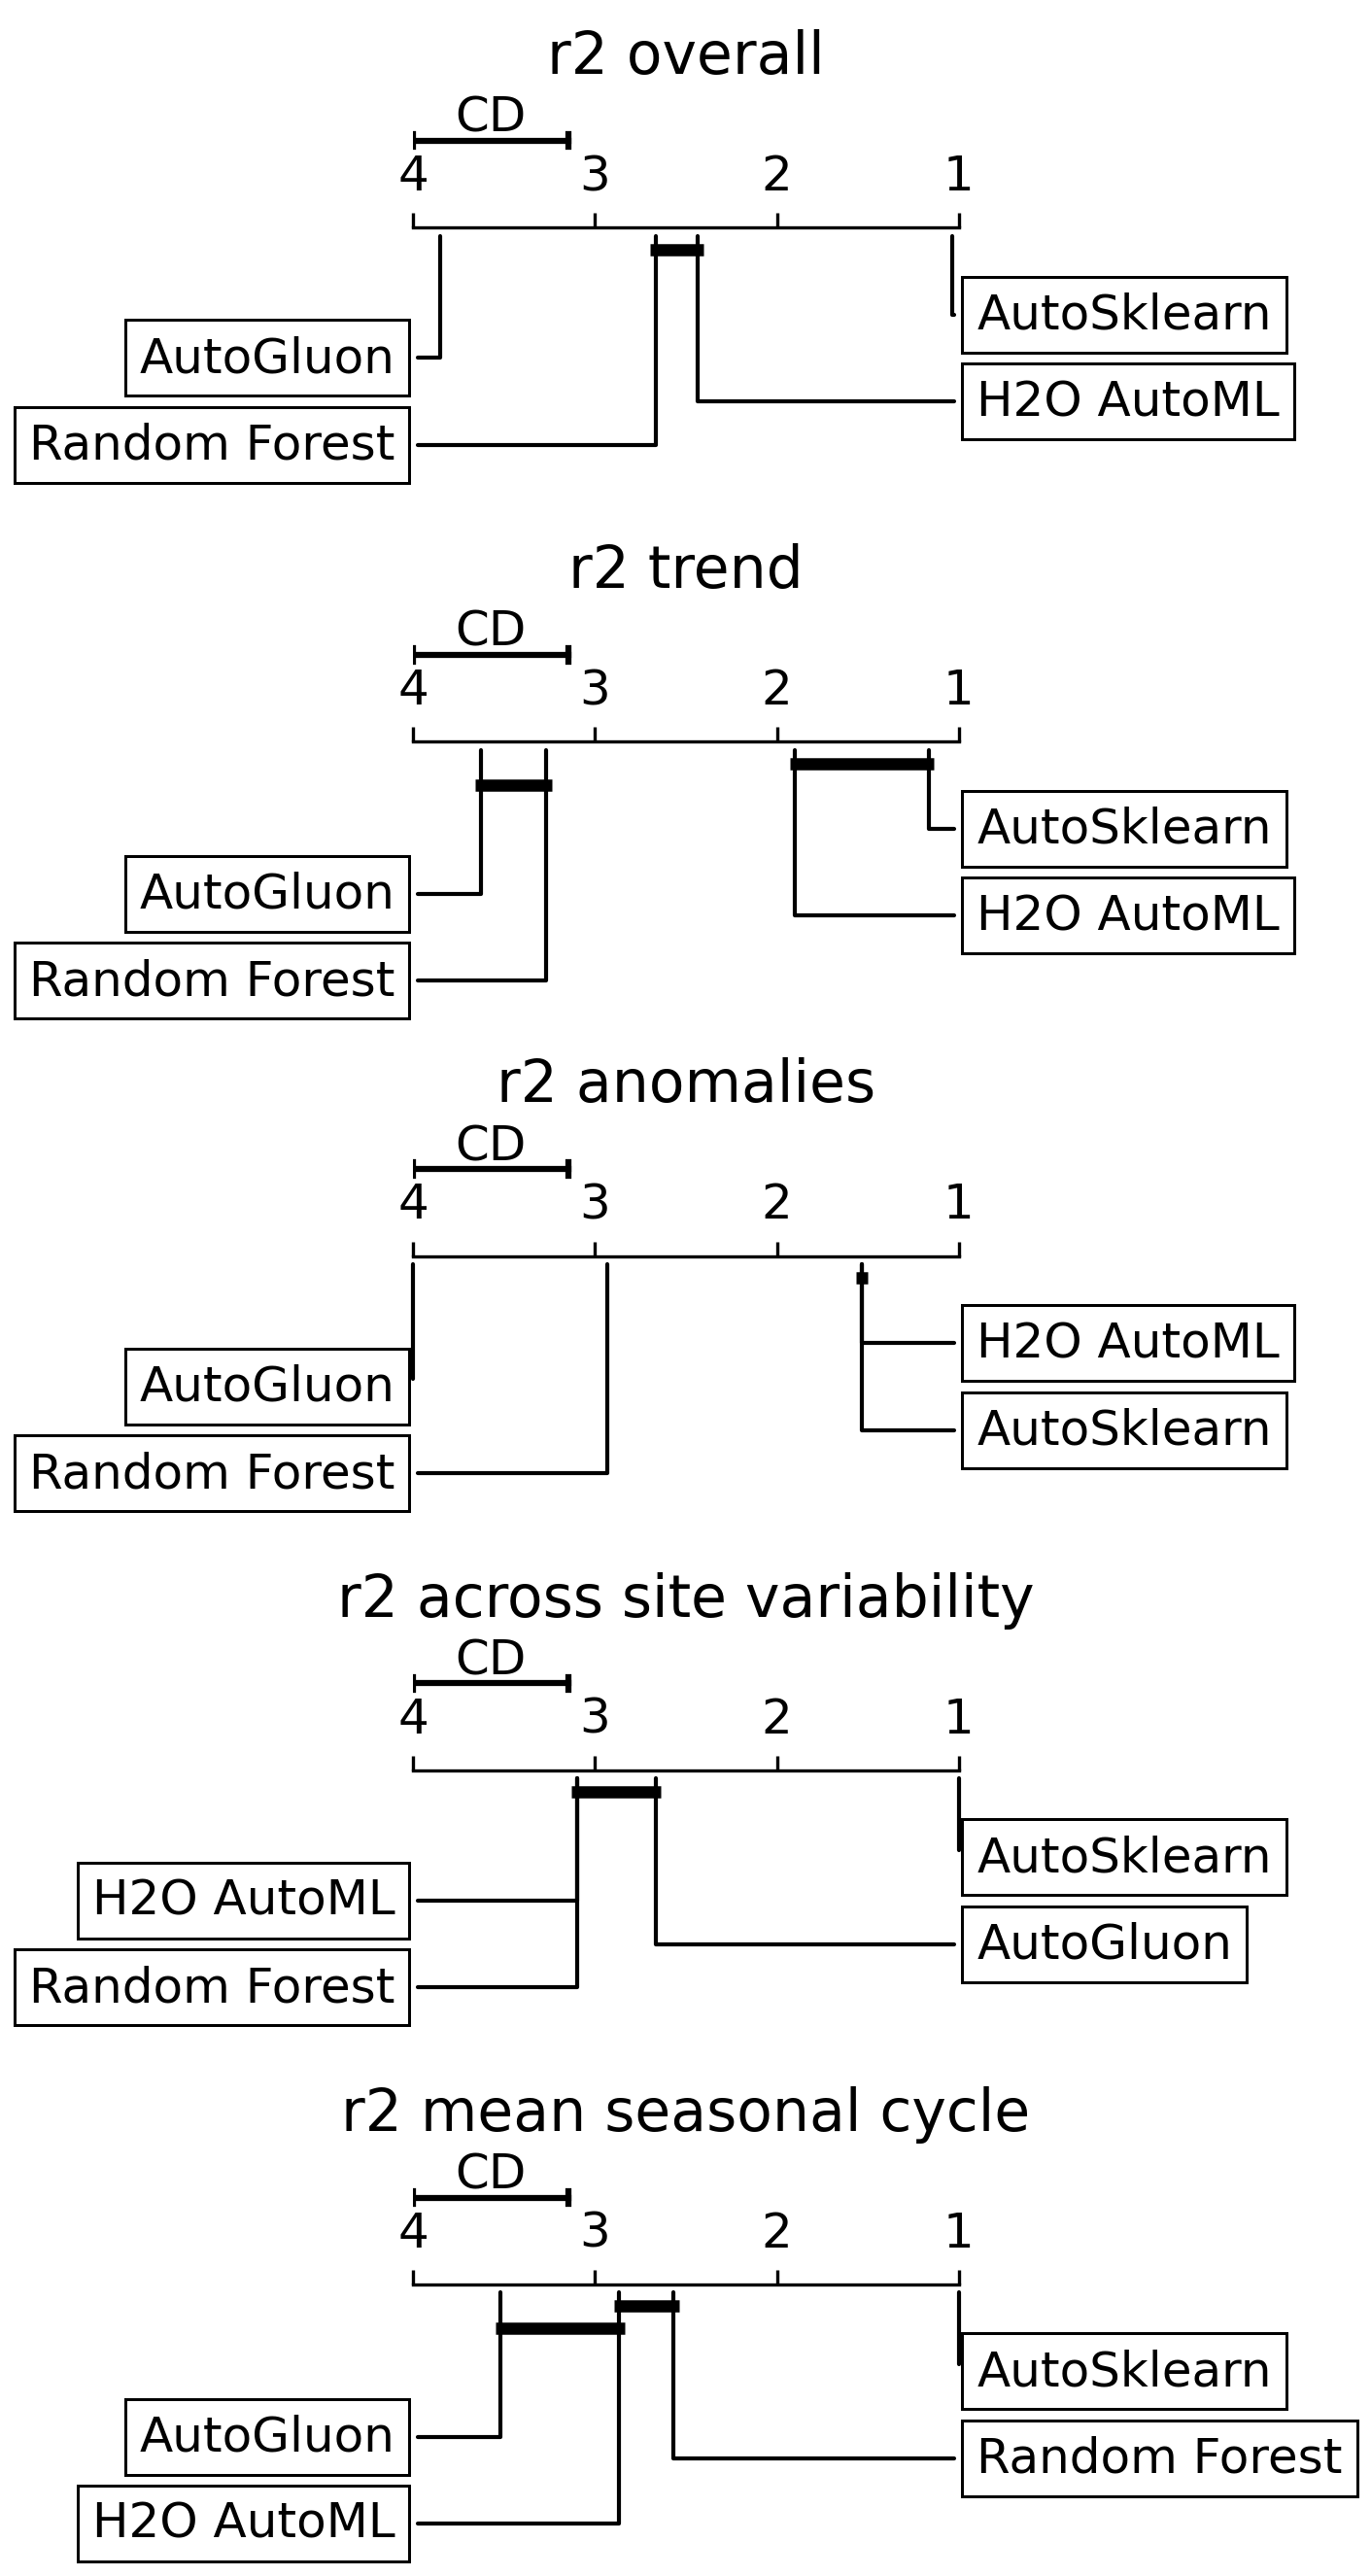

In [18]:
# evaluates differences in framework ranks
median_r2 = df.set_index(['Framework', 'Explanatory variable set'], append=True)#.groupby(['Framework', 'Explanatory variable set']).median()

# drop experiments not executed for all models
median_r2 = median_r2[median_r2.index.get_level_values(level=2).isin(['RS'])] #['RS minimal', 'RS minimal +VI', 'RS', 'RS meteo']

fig, axs = plt.subplots(5, 1, figsize=(5, 9))
cols = ['r2 overall', 'r2 trend', 'r2 anomalies', 'r2 across site variability', 'r2 mean seasonal cycle']
for ii, ax in enumerate(axs):
    median_r2_select = median_r2[cols[ii]].unstack(level=1)
    result = autorank(median_r2_select, alpha=0.05, verbose=False)
    print('------', cols[ii])
    print('models: ', result.rankdf.index.values)
    print('friedman p-value=', result.pvalue)
    print('shapiro p-value=', result.pvals_shapiro)
    print('cd=', result.cd)
    cd_plot(result, ax=ax)
    ax.set_title(cols[ii])
    
plt.tight_layout()
plt.savefig('analysis/benchmark/benchmark_friedman_rs.pdf')

------ r2 overall
models:  ['RS minimal' 'RS minimal +VI' 'RS' 'RS meteo']
friedman p-value= 1.0937405783517436e-68
shapiro p-value= [1.0160645160794957e-06, 0.01091797836124897, 1.0, 1.0]
cd= 0.428169268246638
------ r2 trend
models:  ['RS minimal +VI' 'RS minimal' 'RS meteo' 'RS']
friedman p-value= 1.3154304584194586e-51
shapiro p-value= [0.0022851696703583, 0.0036532192025333643, 1.0, 1.0]
cd= 0.428169268246638
------ r2 anomalies
models:  ['RS minimal' 'RS minimal +VI' 'RS' 'RS meteo']
friedman p-value= 5.229954033261262e-54
shapiro p-value= [6.587657139789371e-07, 1.80199587890284e-11, 1.0, 1.0]
cd= 0.428169268246638
------ r2 across site variability
models:  ['RS minimal' 'RS meteo' 'RS' 'RS minimal +VI']
friedman p-value= 3.5636024678467065e-27
shapiro p-value= [2.66527104031411e-06, 1.0, 1.0, 4.599828025675379e-05]
cd= 0.428169268246638
------ r2 mean seasonal cycle
models:  ['RS minimal' 'RS minimal +VI' 'RS' 'RS meteo']
friedman p-value= 2.376361472301114e-61
shapiro p-value=

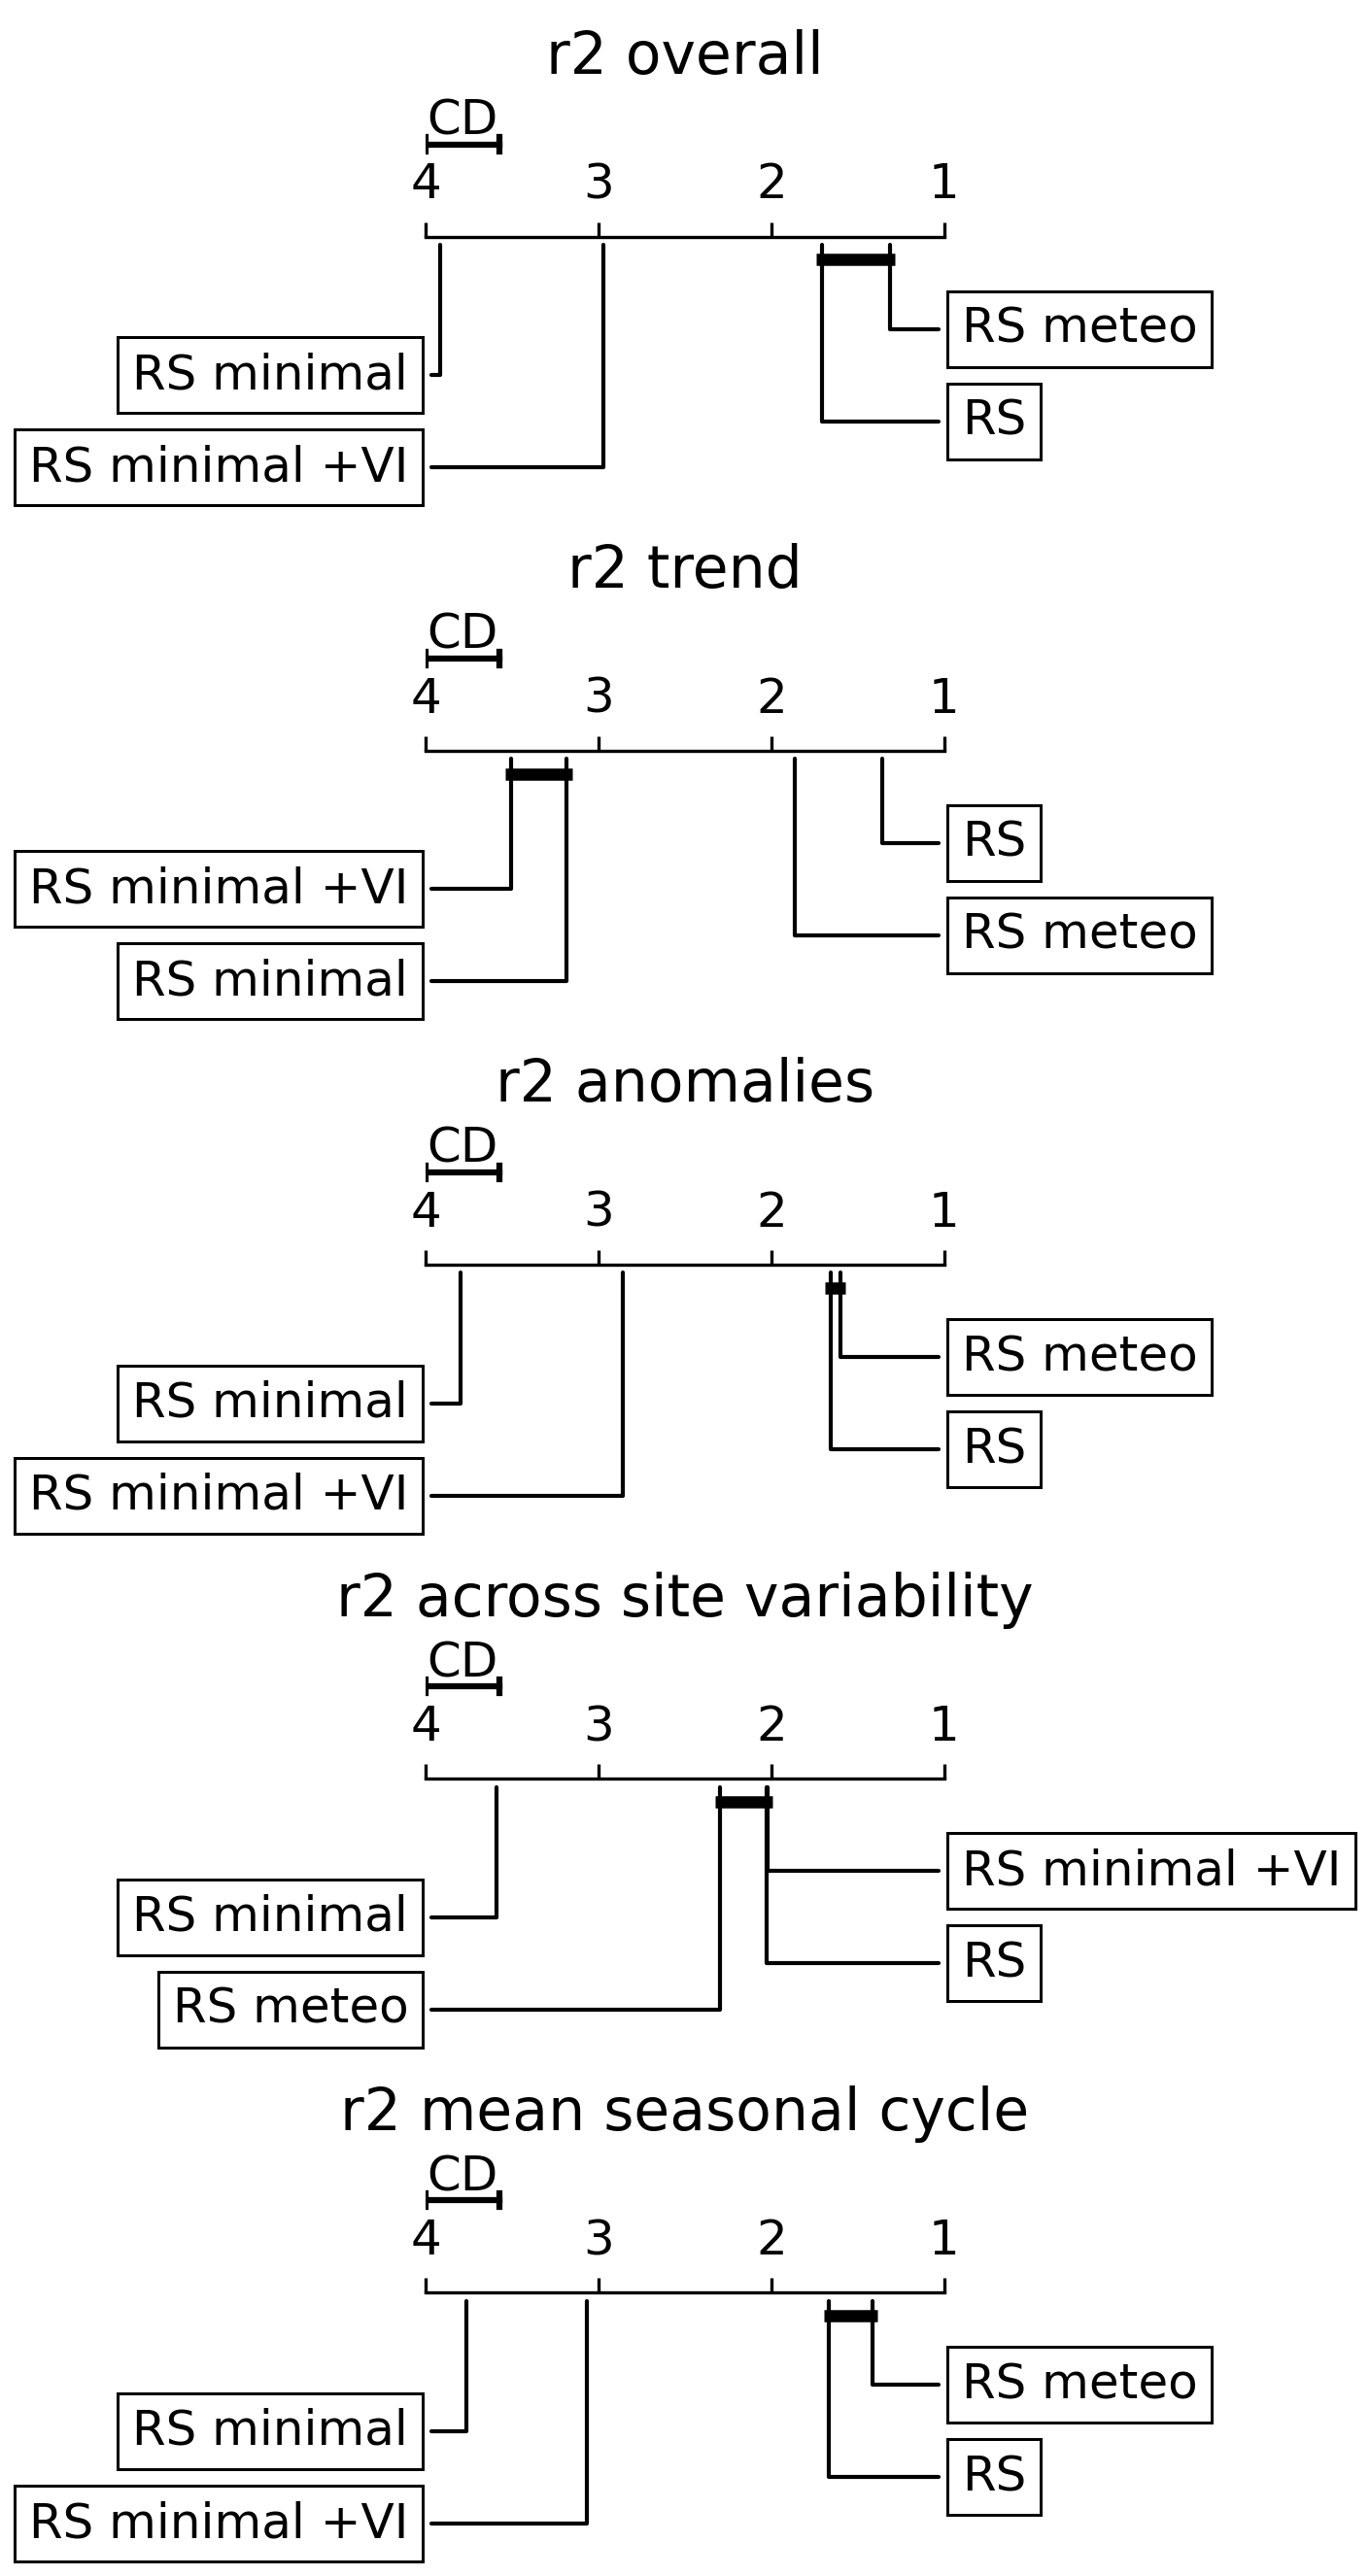

In [32]:
# evaluates differences in predictor variable ranks
median_r2 = df.set_index(['Framework', 'Explanatory variable set'], append=True)#.groupby(['Framework', 'Explanatory variable set']).median()

# drop experiments not executed for all models
median_r2 = median_r2[median_r2.index.get_level_values(level=2).isin(['RS minimal', 'RS minimal +VI', 'RS', 'RS meteo'])]
fig, axs = plt.subplots(5, 1, figsize=(5, 9))
cols = ['r2 overall', 'r2 trend', 'r2 anomalies', 'r2 across site variability', 'r2 mean seasonal cycle']

for ii, ax in enumerate(axs):
    median_r2_select = median_r2[cols[ii]].unstack(level=2)
    result = autorank(median_r2_select, alpha=0.05, verbose=False)
    print('------', cols[ii])
    print('models: ', result.rankdf.index.values)
    print('friedman p-value=', result.pvalue)
    print('shapiro p-value=', result.pvals_shapiro)
    print('cd=', result.cd)
    cd_plot(result, ax=ax)
    ax.set_title(cols[ii])
    
plt.tight_layout()
plt.show()

In [30]:
baseline_framework = 'H2O AutoML'
comparison_framework = 'H2O AutoML'
ts_feature = 'r2_sites'
baseline_variable = 'RS minimal'
comparison_variable = 'RS minimal +Year'

baseline = df.loc[(df['Framework'] == baseline_framework) & (df['Explanatory variable set'] == baseline_variable), ts_feature]
comparison = df.loc[(df['Framework'] == comparison_framework) & (df['Explanatory variable set'] == comparison_variable), ts_feature]

# perform a shapiro-wilk test for normality
# H0: r2 drawn from normal distribution
# H1: Not drawn from normal distribution
# significance: 5%

test_stat, p_value = stats.shapiro(comparison)
print('shapiro:', test_stat, p_value)


# perform one-sided z-test
# H0: Mean r2 not better than baseline RF
# H1: Mean r2 better than baseline
# significance: 5%

z_value, p_value = ztest(baseline, comparison, alternative='smaller')
print('z-test:', z_value, p_value)

# perform one-sided wilcox-signed rank test
# H0: The distribution of differences in r2 is symmetric to zero
# H1: The distribution is stochastically less than a distribution symmetric to zero
# significance: 5%

wilcox_value, p_value = stats.wilcoxon(baseline, comparison, alternative='less')
print('wilcoxon:', wilcox_value, p_value)

# accounting for the look-elsewhere effect
# Benjamini-Hochberg


shapiro: 0.9741055369377136 0.656399667263031
z-test: -0.23396062724543076 0.40750777265317395
wilcoxon: 211.0 0.3350902944803238


# Land cover analysis
## Create LC metrics

In [33]:
sites = pd.read_csv('data/ec/sites_meta_v1.csv', index_col=0)
lc_metrics = analysis.eval_lc('2022110313584614', 'experiments/', sites, out_path='analysis/benchmark/', min_months=24)

## Plot LC analysis

In [42]:
lc_metrics = pd.read_csv('analysis/benchmark/2022110313584614/metrics_lc.csv', index_col='SITE_ID')
lc_metrics = lc_metrics.rename(columns={'IGBP': 'Land Cover'}).reset_index()

In [43]:
lc_metrics.groupby('Land Cover').median()

/tmp/ipykernel_180/281593598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lc_metrics.groupby('Land Cover').median()


,r2_overall,r2_msc,r2_anomalies
Land Cover,,,
CRO,0.510335,0.832995,0.071058
DBF,0.869844,0.889265,0.287838
EBF,-0.380070,-0.406061,0.030975
ENF,0.793653,0.871212,0.077759
GRA,0.626121,0.700164,0.264273
MF,0.839219,0.874533,0.082496
SAV,0.620395,0.677627,0.362109
SH,0.327845,0.401234,0.217041
WET,0.480434,0.651493,0.002835


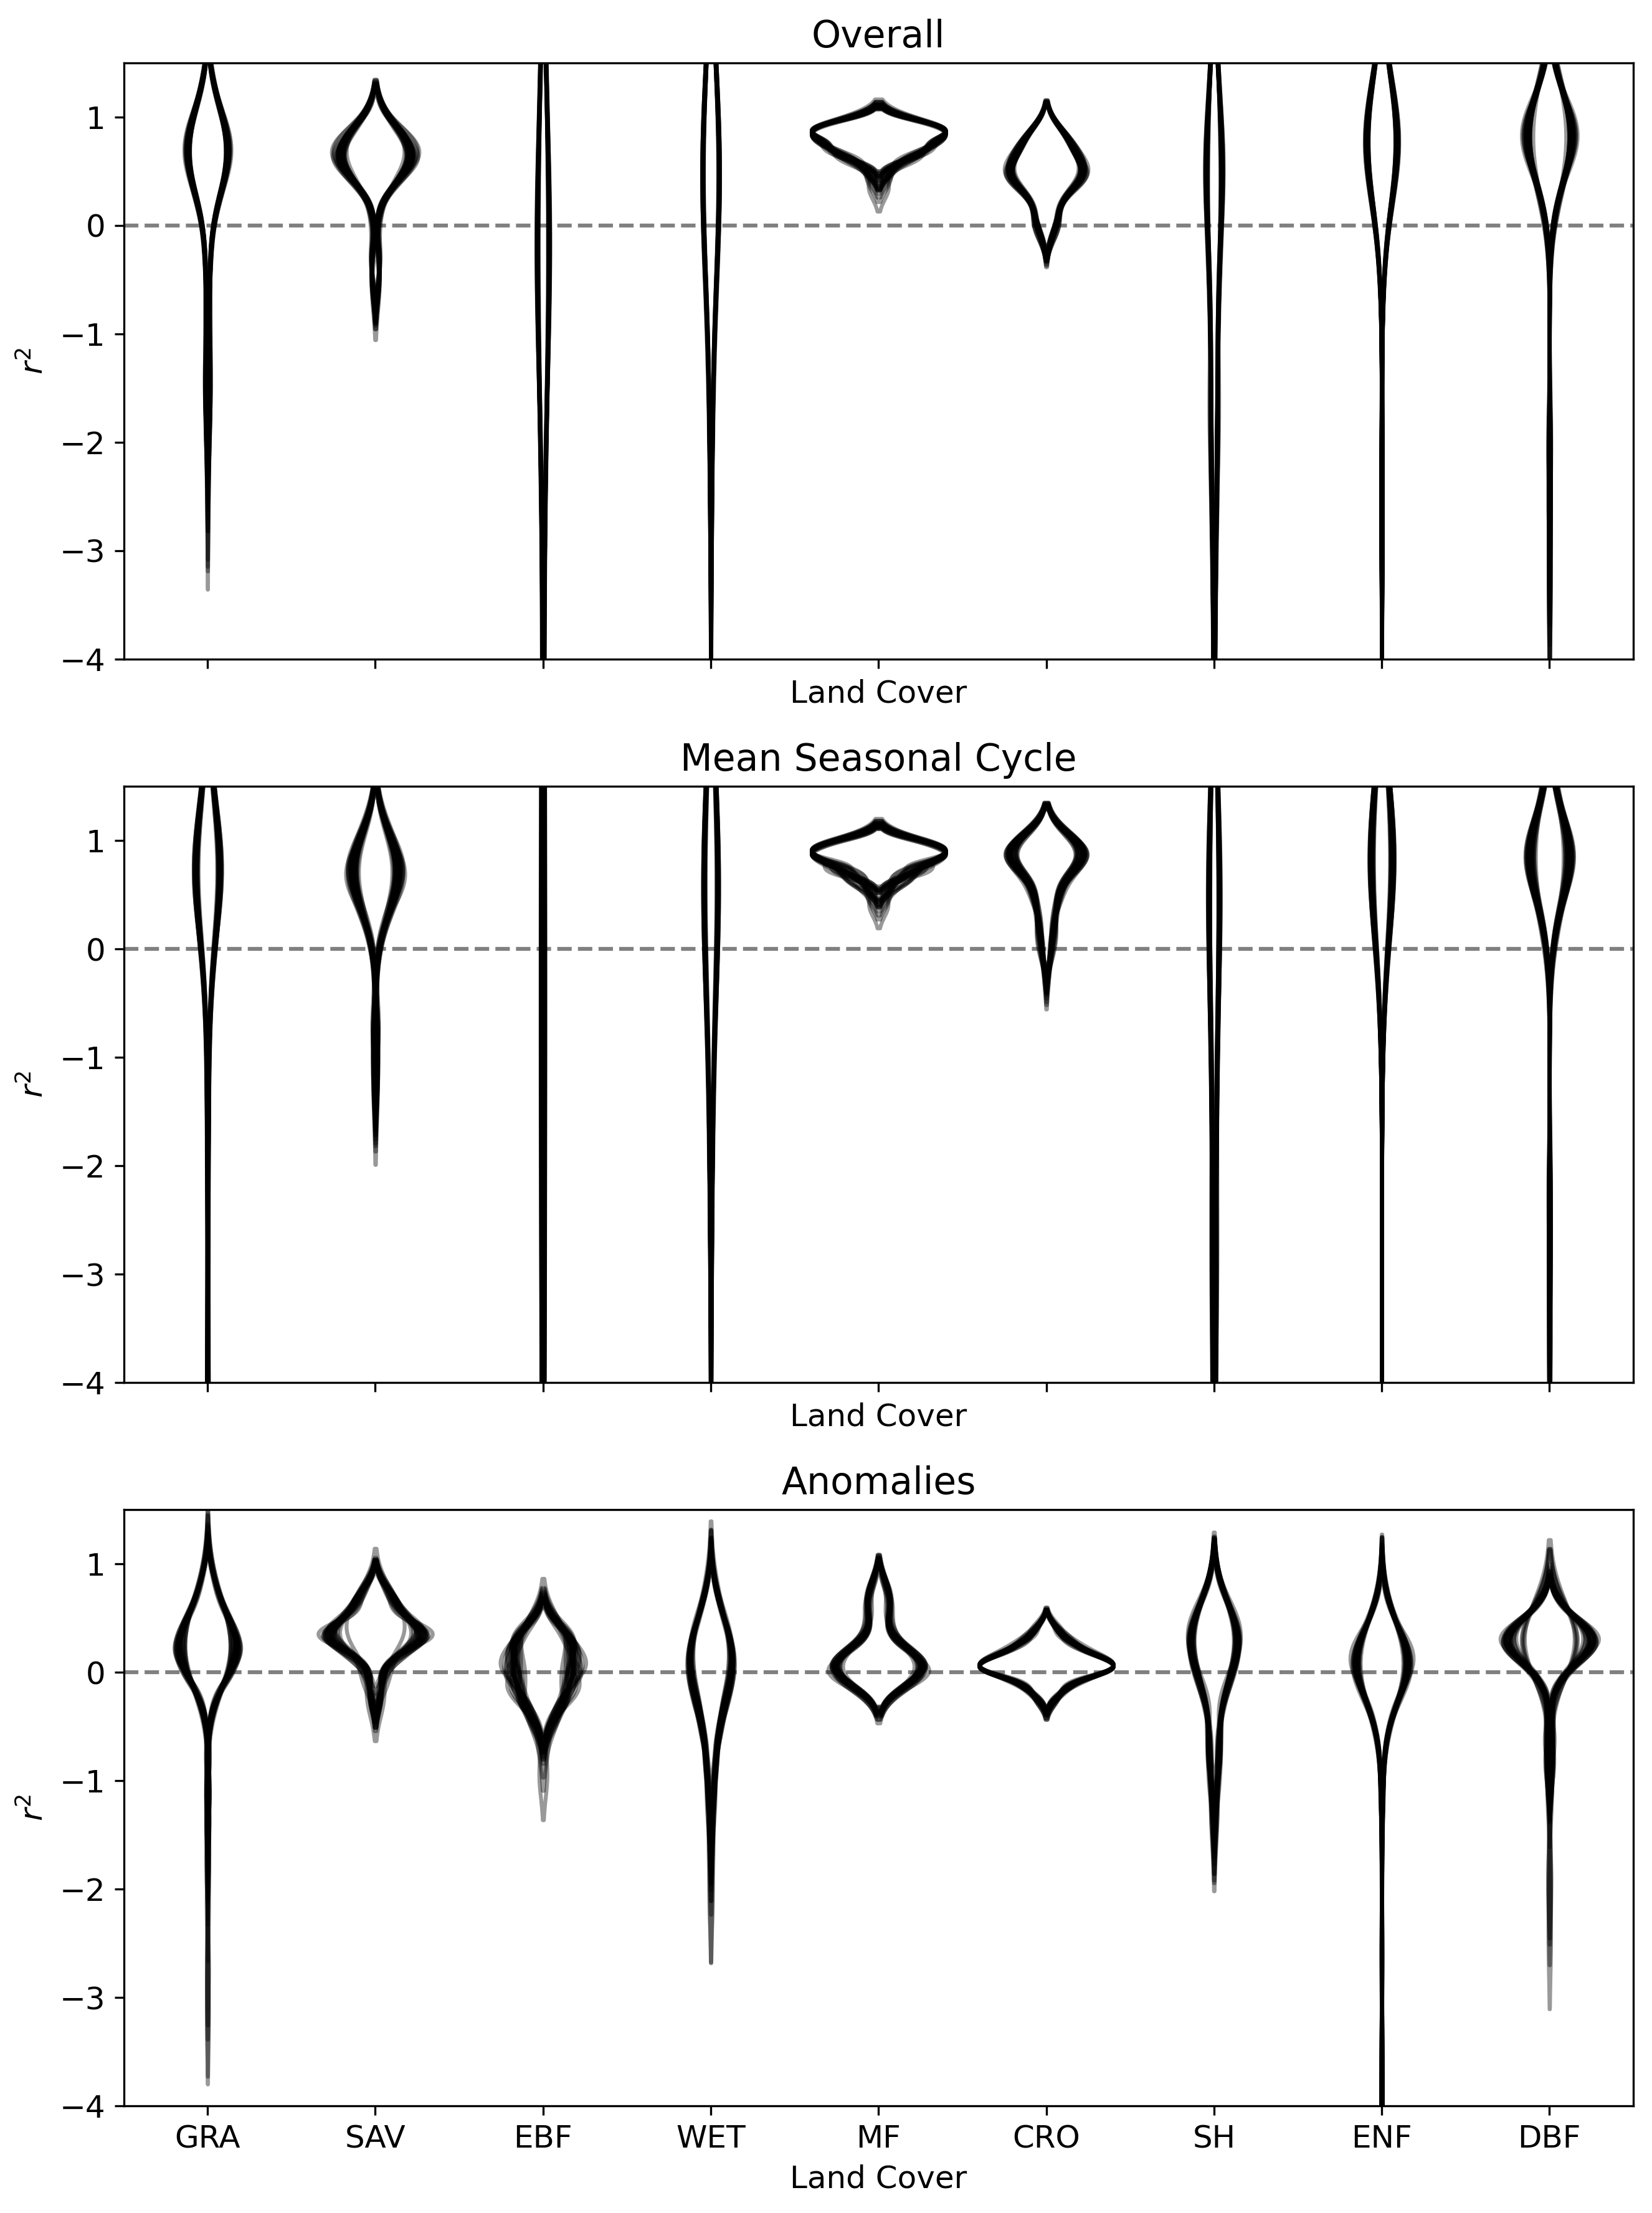

In [36]:
analysis.plt_lc_violin(lc_metrics, 'analysis/benchmark', 'Land Cover', 'exp_id')

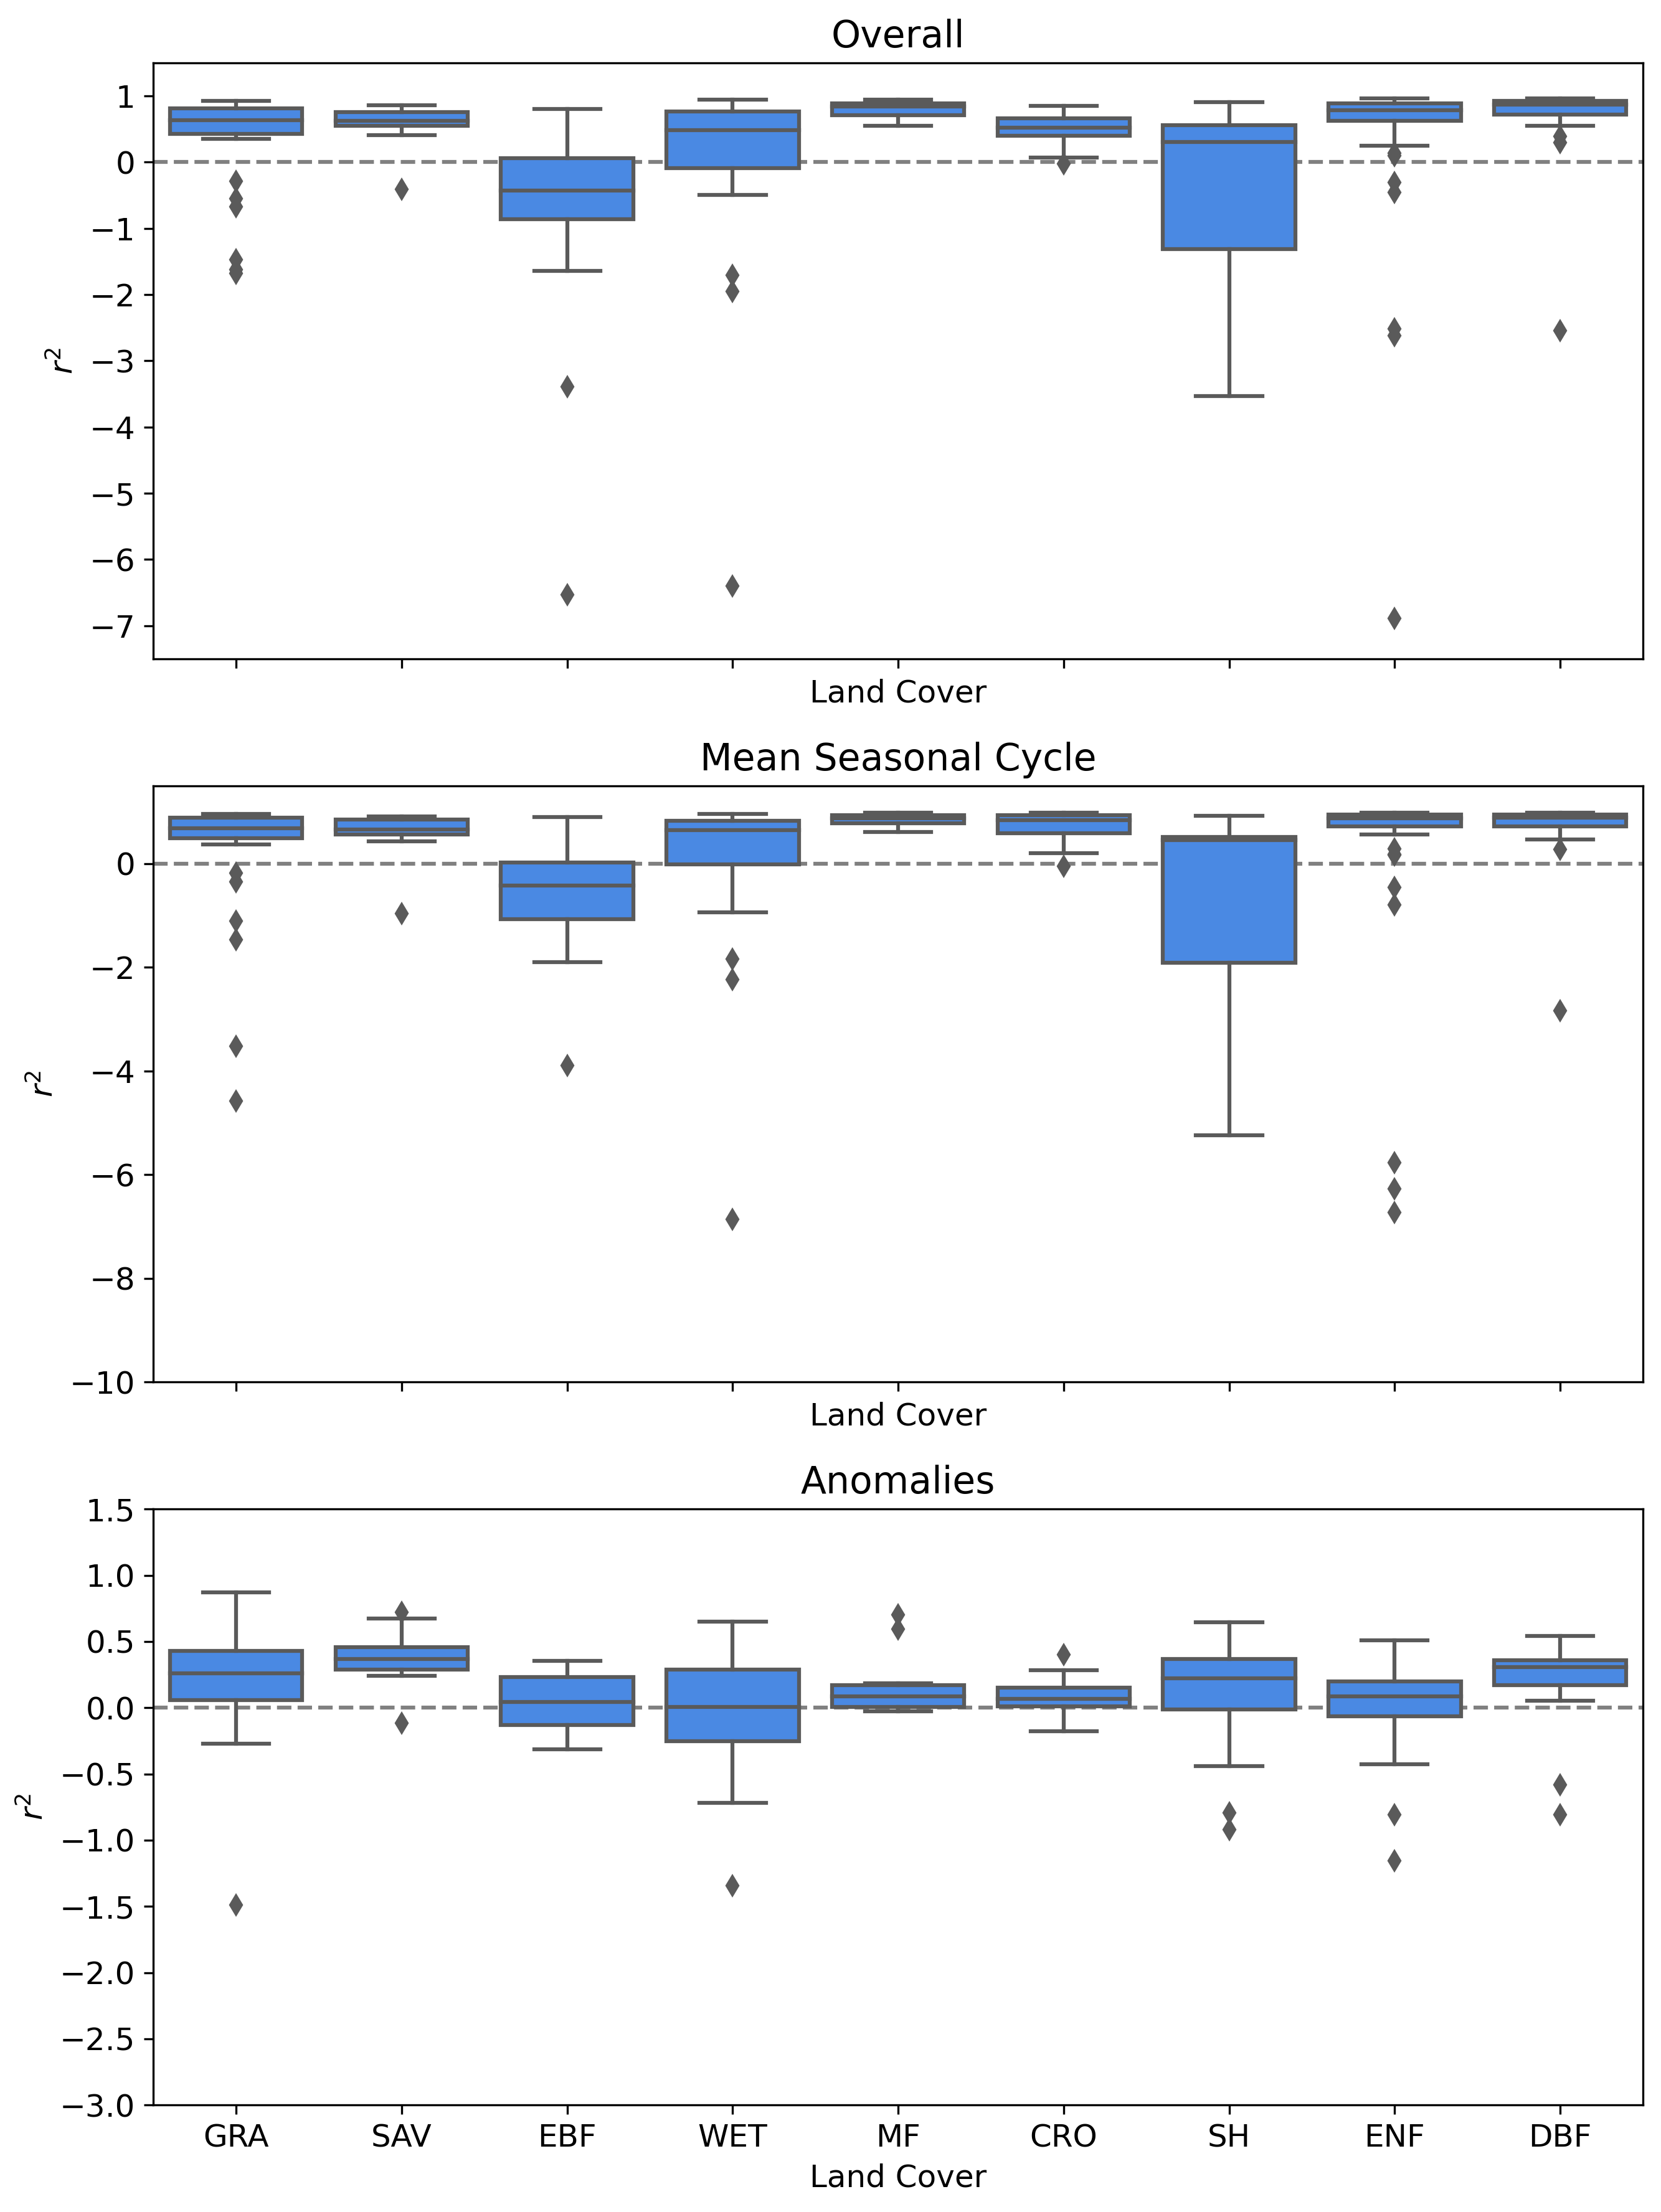

In [44]:
analysis.plt_lc_meanbox(lc_metrics, 'analysis/benchmark', 'Land Cover', 'exp_id')

In [9]:
from importlib import reload
reload(analysis)
reload(utils)

<module 'modules.utils' from '/global/scratch/users/maxgaber/gpp_upscaling/gpp/modules/utils.py'>